In [6]:
import numpy as np
from sklearn import datasets
import random
import matplotlib.pyplot as p
import math

In [7]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [8]:
train_idx = np.concatenate((np.arange(0,40),np.arange(50,90),np.arange(100,140)))
test_idx = np.setdiff1d(np.arange(0,150), train_idx)
X_train = X[train_idx]

In [9]:
#normalize the training data in the range of [0,1]
max_X = np.max(X_train, axis=0)
min_X = np.min(X_train, axis=0)
X_train = (X_train - min_X)/(max_X-min_X)

In [10]:
X_test = X[test_idx]
X_test = (X_test - min_X)/(max_X-min_X)

In [11]:
y_train = y[train_idx]
y_test = y[test_idx]

In [67]:
# pseudo random generator: random.gauss(mu, sigma)
def weights(m,n):
    l1 = []
    
    for i in range(m):
        l2 =[]
        for j in range(n):
            l2.append(random.gauss(0,math.sqrt(2/m)))
        l1.append(l2)
    return np.array(l1)

In [13]:
def ReLU(x):
    return np.maximum(0,x)

In [14]:
#softmax function
def softmax(x):
    return np.exp(x) / np.exp(x).sum(axis=0)
    

In [68]:
def crossEntropy(pred,y):
    n = len(pred)
    probs = -np.log(pred[range(n),y])    
    return np.sum(probs)/n

In [16]:
#ReLU derivation
def backReLU(x):
    x[x <= 0] = 0
    x[x > 0] = 1
    return x

In [17]:
#softmax back propagation
def backSoftmax(x):
    l = len(x)
    for i in x:
        i = (1-i)/l
    return x

In [62]:
#main function..

def neuralNetwork(X,Y,N,alpha,reg):
    
    D = len(X[0])
    L = len(X)
    C = len(list(set(Y)))
    
    #initializing weights for all 3 layers
    W1 = weights(D,N)
    W2 = weights(N,N)
    W3 = weights(N,C)
    
    #initializing bias with zero
    b1 = np.zeros((1,N))
    b2 = np.zeros((1,N))
    b3 = np.zeros((1,C))
    
    i = 1
    acc_lst = []
    loss_lst = []
    #loop for 1000 ephocs...
    while i<=1000:
        """Layer1"""
        #ReLU activation
        prod = np.dot(X,W1)+b1
        h1 = ReLU(prod)
        
        """Layer2"""
        #ReLU activation
        prod = np.dot(h1,W2)+b2
        h2 = ReLU(prod)
        
        """Layer3"""
        prod = np.dot(h2,W3)+b3
        output = softmax(prod)
        
        """Cross entropy"""
        loss = crossEntropy(output,Y)
        
        #extracting details for each 100 epochs
        if i % 100 == 0:
            loss_lst.append(loss)
            predicted_class = np.argmax(output, axis=1)
            acc = 100*np.mean(predicted_class == Y)
            acc_lst.append(acc)
            print("iteration %d: loss %f, accuracy %f" % (i, loss,acc))
            
           
        #compute the gradient on output
        temp_out = output
        temp_out[range(L),Y] -= 1
        temp_out /= L
        
        """Layer3"""
        #backpropagate softmax
        dOut = backSoftmax(temp_out)
        
        W_3 = np.dot(h2.T,dOut)
        db3 = np.sum(dOut, axis=0, keepdims=True)
        h2_new = np.dot(dOut, W3.T)
        
        """Layer2"""
        #back propagate ReLU
        h2_new = backReLU(h2_new)
        
        W_2 = np.dot(h1.T,h2_new)
        db2 = np.sum(h2_new, axis=0, keepdims=True)
        h1_new = np.dot(h2_new, W2.T)

        """Layer1"""
        #back propagate ReLU
        h1_new= backReLU(h1_new)

        W_1 = np.dot(X.T,h1_new)
        db1 = np.sum(h1_new, axis=0, keepdims=True)
        
        #regularizing weights
        W_3 += (reg * W3)
        W_2 += (reg * W2)
        W_1 += (reg * W1)


        # perform a parameter update
        W1 += -alpha * W_1
        b1 += -alpha * db1
        W2 += -alpha * W_2
        b2 += -alpha * db2
        W3 += -alpha * W_3
        b3 += -alpha * db3

        i += 1
    
    
    return output,acc_lst,loss_lst

Train dataset:

iteration 100: loss 4.639546, accuracy 63.333333
iteration 200: loss 4.584466, accuracy 65.000000
iteration 300: loss 4.598123, accuracy 64.166667
iteration 400: loss 4.651339, accuracy 64.166667
iteration 500: loss 4.649569, accuracy 64.166667
iteration 600: loss 4.648859, accuracy 64.166667
iteration 700: loss 4.648573, accuracy 64.166667
iteration 800: loss 4.648458, accuracy 64.166667
iteration 900: loss 4.648412, accuracy 64.166667
iteration 1000: loss 4.648393, accuracy 64.166667


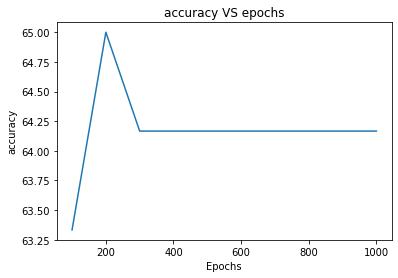

In [50]:
N = 100
alpha = 0.01
reg = 0.5
y_out,acc_lst,loss_lst = neuralNetwork(X_train,y_train,N,alpha,reg)

#plot

ephocs_lst =[100,200,300,400,500,600,700,800,900,1000]
p.plot(ephocs_lst, acc_lst)
p.xlabel("Epochs")
p.ylabel("accuracy")
p.title("accuracy VS epochs")
p.show()

We can choose our model at 1000th epoch as in the range of 1000 epochs, at 1000th epoch we obtained the maximum accuracy.

Test dataset:

iteration 100: loss 3.327442, accuracy 43.333333
iteration 200: loss 3.360638, accuracy 66.666667
iteration 300: loss 3.401454, accuracy 60.000000
iteration 400: loss 3.401870, accuracy 36.666667
iteration 500: loss 3.401883, accuracy 36.666667
iteration 600: loss 3.401888, accuracy 36.666667
iteration 700: loss 3.401890, accuracy 36.666667
iteration 800: loss 3.401891, accuracy 36.666667
iteration 900: loss 3.401892, accuracy 36.666667
iteration 1000: loss 3.401892, accuracy 36.666667


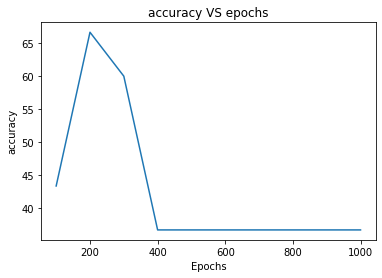

In [55]:
#Test the performance of the learned model on the test data
N = 100
alpha = 0.01
reg = 0.5
y_out,acc_lst,loss_lst = neuralNetwork(X_test,y_test,N,alpha,reg)

#plot
import matplotlib.pyplot as p
ephocs_lst =[100,200,300,400,500,600,700,800,900,1000]
p.plot(ephocs_lst, acc_lst)
p.xlabel("Epochs")
p.ylabel("accuracy")
p.title("accuracy VS epochs")
p.show()

We can choose our model at 600 epoch as in the range of 1000 epochs, at 600th epoch we obtained the maximum accuracy.